In [1]:
CHANNEL = "IR3"

In [2]:
import s3fs
import xarray as xr

s3 = s3fs.S3FileSystem(profile="mats")
#s3 = s3fs.S3FileSystem(anon=True)

store = s3fs.S3Map(
    root=f"test-release-v0.9/mats-level-1b-limb-cropd-{CHANNEL}.zarr",
    s3=s3,
)
ds = xr.open_zarr(store, consolidated=True)


In [3]:
data = ds.ImageCalibrated.sel(time=slice('2023-02-18T15:00','2023-02-18T21:10')).compute()

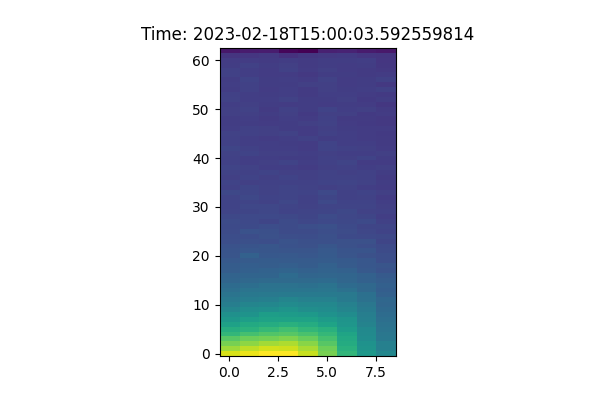

No such comm: fb7bd680c84b4ab4a694e0f24c0dd705


In [4]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import matplotlib.animation as animation


fig, ax = plt.subplots(figsize=(6, 4))
img = ax.imshow(data.isel(time=0), cmap='viridis',interpolation='nearest', aspect=1/4)
ax.invert_yaxis()
title = ax.set_title(f"Time: {data.time.isel(time=0).values}")

def animate(i):
    img.set_data(data.isel(time=i))
    title.set_text(f"index: {i} Time: {data.time.isel(time=i).values}")
    return img, title

ani = animation.FuncAnimation(
    fig, animate,
    frames=len(data.time),
    interval=100,
    blit=True,
    repeat=False
)

In [5]:
plt.close('all')